In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(10+60.5*np.random.randn(1000000,3))
df.columns = ['num','num2','num3']

In [3]:
pd.set_option('float_format', '{:f}'.format)
df.describe()

## 1,000,000개

,num,num2,num3
count,1000000.000000,1000000.000000,1000000.000000
mean,9.957835,10.012214,9.990334
std,60.507266,60.547505,60.532176
min,-276.692958,-268.816352,-295.506687
25%,-30.787365,-30.709112,-30.826957
50%,9.931063,9.999567,9.987313
75%,50.750260,50.765389,50.876668
max,284.324057,325.453612,302.838965


In [4]:
# 10 < num < 100
# 0.5 < num2 < 10
# 255 < num3 < 50

result = df.query('10 < num < 100 & 0.5 < num2 < 10 & 25< num3 < 50')

len(result)


3874

In [5]:
BM = (df['num'] > 10) & (df['num'] < 100)
BM2 = (df['num2'] > 0.5) & (df['num2'] < 10)
BM3 = (df['num3'] > 25) & (df['num3'] < 50)

result = df[BM & BM2 & BM3]

len(result)



3874

In [6]:
#10 < num < 20
a = 10
b = 20
result = df.query('@a < num <@b') #  @를 붙이면 변수 취급


In [7]:
sub_station = pd.read_csv('D:\git_local_repository\data_for_project\seoul_bike\sub_station.csv',encoding='CP949')

In [8]:
# 검색용 Good!!
sub_station.query('역사명 == "김포공항"')


,역사_ID,역사명,호선,경도,위도
2,4929,김포공항,김포골드라인,126.801868,37.562360
88,4207,김포공항,공항철도1호선,126.801904,37.561842
130,4102,김포공항,9호선,126.802152,37.561916
352,2513,김포공항,5호선,126.801292,37.562384


In [9]:
stations = ['김포공항', '신논현']
sub_station.query('역사명 == @stations').sort_values(by='역사명',ascending=False)

,역사_ID,역사명,호선,경도,위도
107,4125,신논현,9호선,127.025060,37.504598
2,4929,김포공항,김포골드라인,126.801868,37.562360
88,4207,김포공항,공항철도1호선,126.801904,37.561842
130,4102,김포공항,9호선,126.802152,37.561916
352,2513,김포공항,5호선,126.801292,37.562384


In [10]:
import matplotlib.pyplot as plt

In [11]:
for i, name in zip(asd.values[0], asd.columns) : 
    print(i,name)

NameError: name 'asd' is not defined

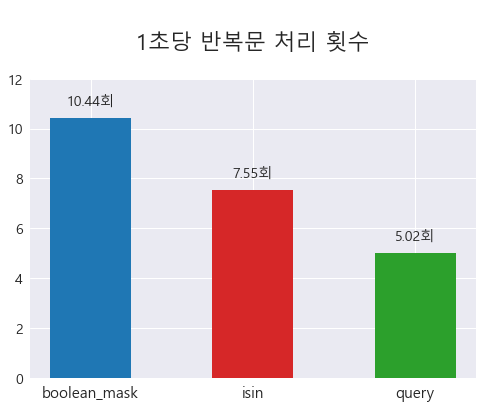

In [ ]:
# matplotlib 폰트설정
from matplotlib import font_manager,rc

plt.style.use('seaborn')
# path = 'D:/git_local_repository/hugo_blog/static/css/fonts/IBM_Bold.ttf'
path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name) # For Windows

asd = pd.DataFrame([10.44,7.55,5.02]).T
asd.columns = ['boolean_mask','isin','query']
ax = plt.bar(asd.columns, asd.values[0],color=['tab:blue','tab:red','tab:green'],width=0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.ylim([0,12])
plt.title('\n1초당 반복문 처리 횟수',fontsize=22, pad=30, y=1)
for i, name in zip(asd.values[0], asd.columns) : 
    plt.text(x=name,y=i+0.5 ,s=f'{i}회',fontsize=14, ha='center')

plt.show()



In [ ]:
## query
stations = ['김포공항', '신논현','여의도','여의나루']
sub_station.query('역사명 == @stations').sort_values(by='역사명',ascending=False)

,역사_ID,역사명,호선,경도,위도
117,4115,여의도,9호선,126.924030,37.521760
338,2527,여의도,5호선,126.924357,37.521747
337,2528,여의나루,5호선,126.932901,37.527098
107,4125,신논현,9호선,127.025060,37.504598
2,4929,김포공항,김포골드라인,126.801868,37.562360
88,4207,김포공항,공항철도1호선,126.801904,37.561842
130,4102,김포공항,9호선,126.802152,37.561916
352,2513,김포공항,5호선,126.801292,37.562384


In [ ]:
## isin
stations = ['김포공항', '신논현','여의도','여의나루']

BM = sub_station['역사명'].isin(stations)
sub_station[BM].sort_values(by='역사명',ascending=False)

,역사_ID,역사명,호선,경도,위도
117,4115,여의도,9호선,126.924030,37.521760
338,2527,여의도,5호선,126.924357,37.521747
337,2528,여의나루,5호선,126.932901,37.527098
107,4125,신논현,9호선,127.025060,37.504598
2,4929,김포공항,김포골드라인,126.801868,37.562360
88,4207,김포공항,공항철도1호선,126.801904,37.561842
130,4102,김포공항,9호선,126.802152,37.561916
352,2513,김포공항,5호선,126.801292,37.562384


In [ ]:
## boolean mask
BM1 = sub_station['역사명'] == '김포공항'
BM2 = sub_station['역사명'] == '신논현'
BM3 = sub_station['역사명'] == '여의도'
BM4 = sub_station['역사명'] == '여의나루'

sub_station[BM1 | BM2 | BM3 | BM4].sort_values(by='역사명',ascending=False)

,역사_ID,역사명,호선,경도,위도
117,4115,여의도,9호선,126.924030,37.521760
338,2527,여의도,5호선,126.924357,37.521747
337,2528,여의나루,5호선,126.932901,37.527098
107,4125,신논현,9호선,127.025060,37.504598
2,4929,김포공항,김포골드라인,126.801868,37.562360
88,4207,김포공항,공항철도1호선,126.801904,37.561842
130,4102,김포공항,9호선,126.802152,37.561916
352,2513,김포공항,5호선,126.801292,37.562384
